In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def create_points(mn, mx, r):
  points = [(random.randint(mn, mx), random.randint(mn, mx)) for _ in range(r)]
  return points

In [3]:
def orient(p1, p2, p3):
  cross_product = ((p2[1] - p1[1]) * (p3[0] - p2[0])) - ((p3[1] - p2[1]) * (p2[0] - p1[0]))
  return cross_product

In [4]:
def create_hull(points):
  points.sort(key=lambda x: [x[0], x[1]])
  H = [points[0], points[1]]
  
  # LOWER HULL
  for i in range(2, len(points)):
    while len(H) >= 2 and orient(points[i], H[-1], H[-2]) < 0:
      H.pop()
    H.append(points[i])
  
  # UPPER HULL
  H1 = []
  for j in range(len(points) - 1, -1, -1):
    while len(H1) >= 2 and orient(points[j], H1[-1], H1[-2]) < 0:
      H1.pop()
    H1.append(points[j])
  
  # MERGING HULLS
  H_final = H + H1
  H_final = list(dict.fromkeys(H_final)) # Removing duplicate points
  H_final.append(points[0]) # Appending the first point to last again
  
  return H_final

In [5]:
def scatter_plot(points, H):
  x, y = zip(*points) # Extracting the x and y coordinates from the list
  plt.scatter(x, y)
  
  for i in range(0, len(H) - 1):
    c0 = H[i]
    c1 = H[i + 1]
    plt.plot((c0[0], c1[0]), (c0[1], c1[1]), 'r')
  
  plt.show()

In [6]:
def main():
  mn = int(input("Enter the minimum limit of the grid: "))
  mx = int(input("Enter the maximum limit of the grid: "))
  print("Dimension of the grid will be " + str(mx) + " x " + str(mx))
  r = int(input("Enter the no. of points you want in the grid: "))
  
  points = create_points(mn, mx, r)
  H = create_hull(points)
  print("\n")
  scatter_plot(points, H)
  print("\nThe points: " + str(points))
  print("\nThe hull points: " + str(H))

Enter the minimum limit of the grid: 0
Enter the maximum limit of the grid: 100
Dimension of the grid will be 100 x 100
Enter the no. of points you want in the grid: 10




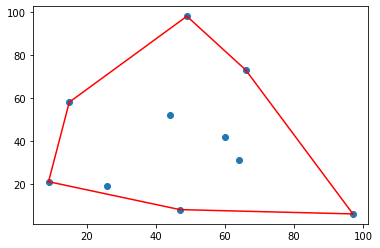


The points: [(9, 21), (15, 58), (26, 19), (44, 52), (47, 8), (49, 98), (60, 42), (64, 31), (66, 73), (97, 6)]

The hull points: [(9, 21), (47, 8), (97, 6), (66, 73), (49, 98), (15, 58), (9, 21)]


In [7]:
if __name__ == "__main__":
  main()